In [29]:
import matplotlib.pyplot as plt
import pickle




In [40]:
def plotdea(file):
    if "pkl" not in file:
        file += ".pkl"
    if "out" not in file:
        file = "out/" + file
    with open(file,'rb') as savefile:
        save = pickle.load(savefile)
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
    ax1.set_yscale('log')
    log = save
    log['epochsteps'] = list(range(1,51))
    for i in range(1, len(log['trainsteps'])):
        if log['trainsteps'][i] < log['trainsteps'][i-1]:
            for j in range(i, len(log['trainsteps'])):
                log['trainsteps'][j] += 1
    ax1.plot(log['trainsteps'], log['train']['batchloss'])
    ax2.plot(log['epochsteps'], log['validation']['accuracy'])
    ax1.set_title('Training loss')
    ax2.set_title('Validation accuracy')
    ax1.set_xlabel('Iterations')
    ax2.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    #plt.savefig(file[:-2]+'loss')
    groups = []
    group = (1,2)
    for i in range(group[0]+1):
        for j in range(group[1]+1):
            groups.append((i,j))
    groups.append("Skip")
    alphas = [[[] for _ in range(len(log['alphas'][0][0]))] for _ in range(len(log['alphas'][0]))]
    for i in range(len(log['alphas'])): #timesteps
        for j in range(len(log['alphas'][0])): #layers
            for k in range(len(log['alphas'][0][0])): #groups
                alphas[j][k].append(log['alphas'][i][j][k])
    _, axs = plt.subplots(2, 4, figsize=(15,8), sharey=True)
    for i in range(len(alphas)):
        for j in range(len(alphas[0])):
            axs[i//4][i%4].plot(list(range(51)), alphas[i][j], label=str(groups[j]))
        axs[i//4][i%4].set_title('Layer '+str(i+1))
    #turn on legend on first subplot
    axs[0][0].legend()



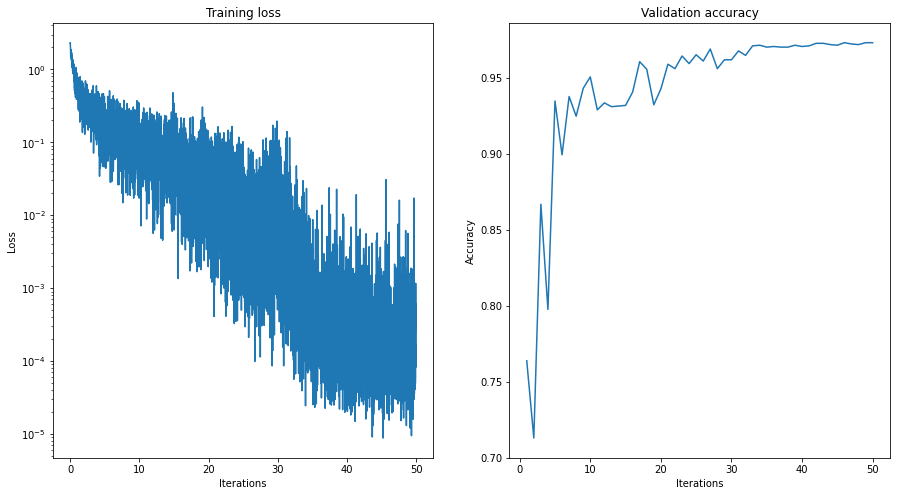

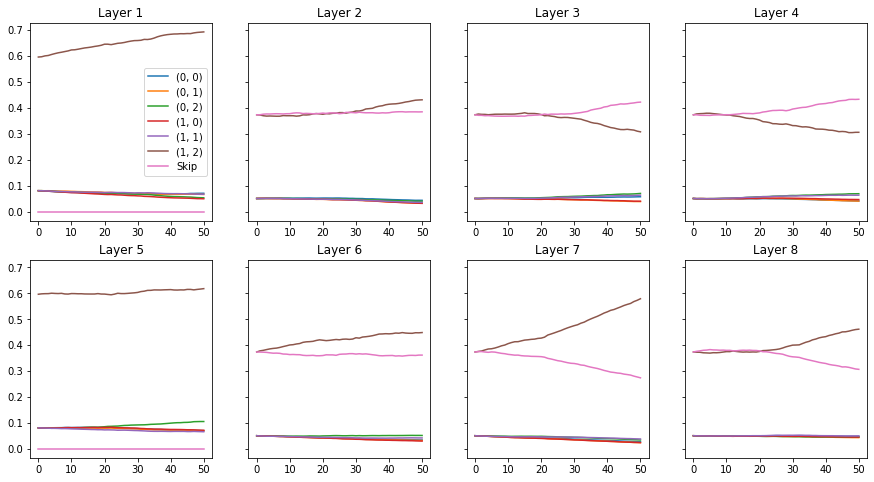

In [41]:
plotdea('out/olympe/logsdea_2022-08-10_19:14:43.pkl')


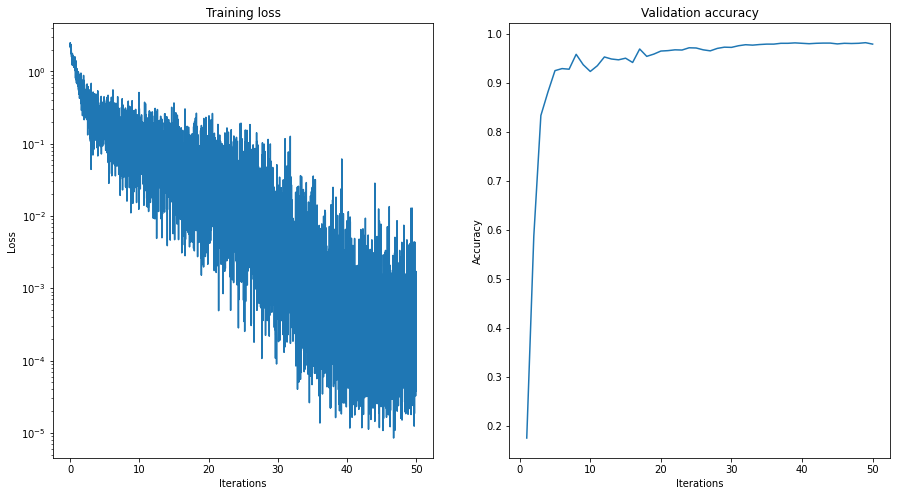

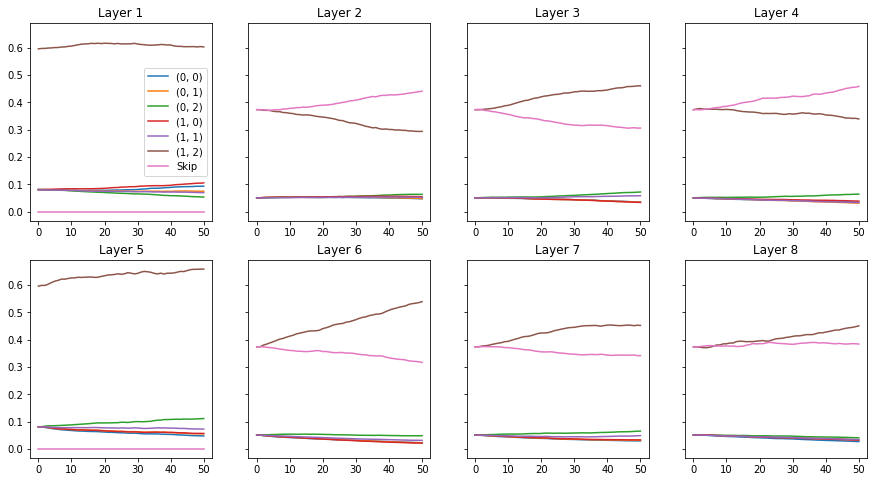

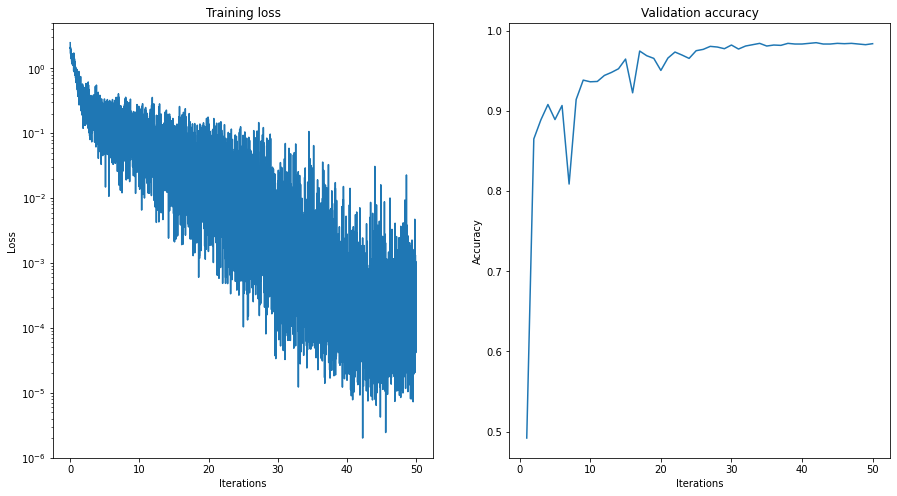

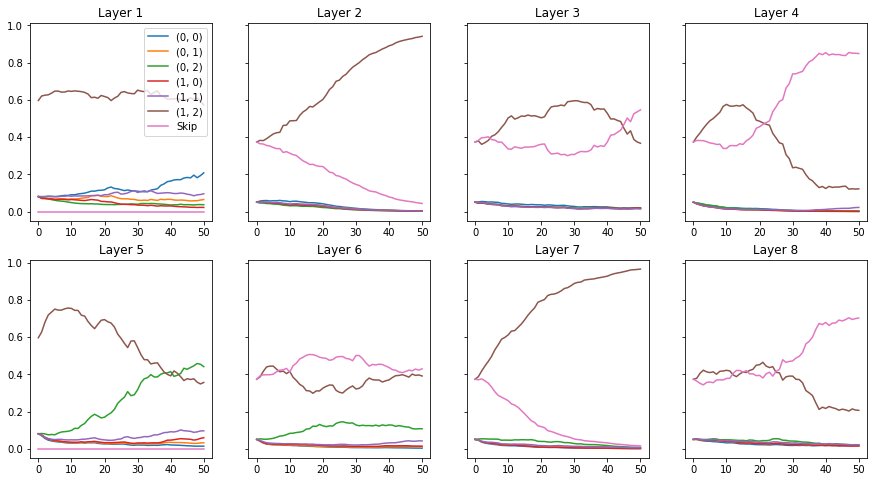

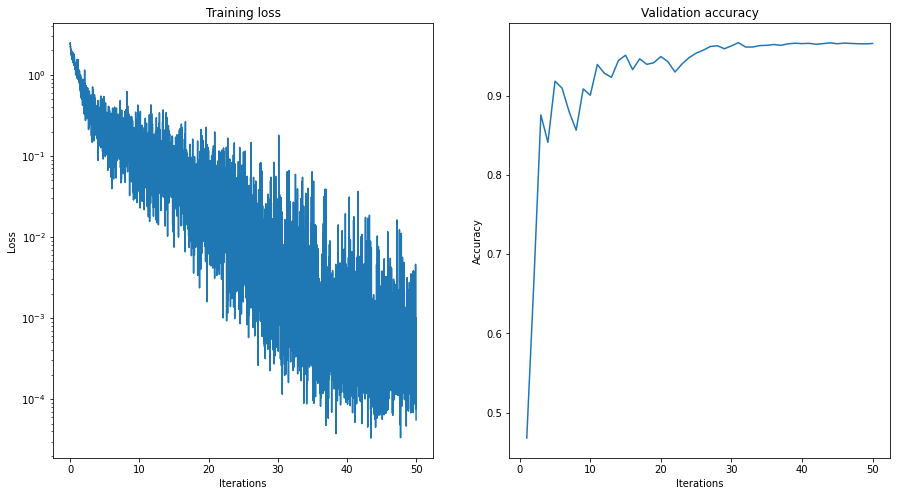

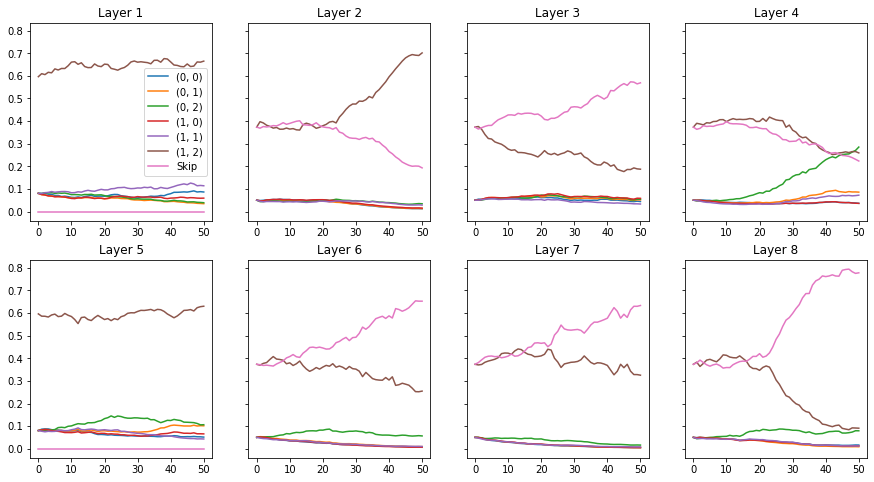

In [42]:
plotdea("out/olympe/logsdea_2022-08-10_22:37:30.pkl")
plotdea("out/olympe/logsdea_2022-08-10_23:07:44.pkl")
plotdea("out/olympe/logsdea_2022-08-11_10:19:49.pkl")

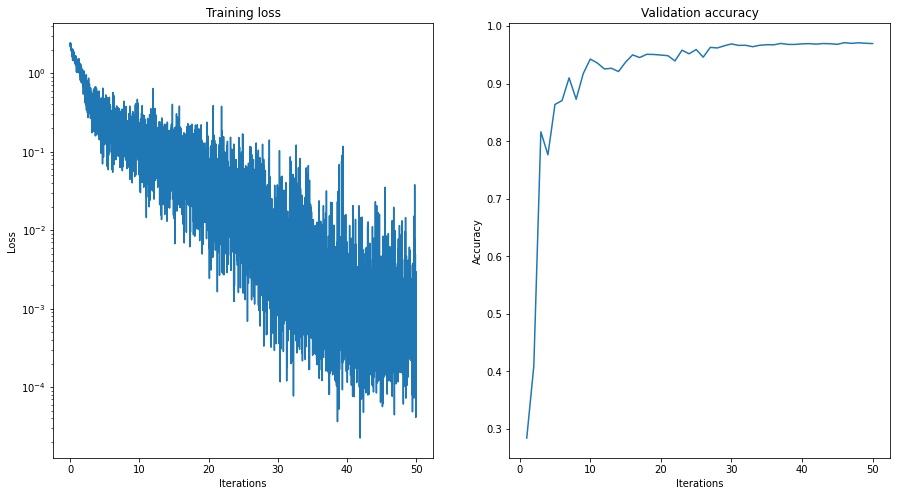

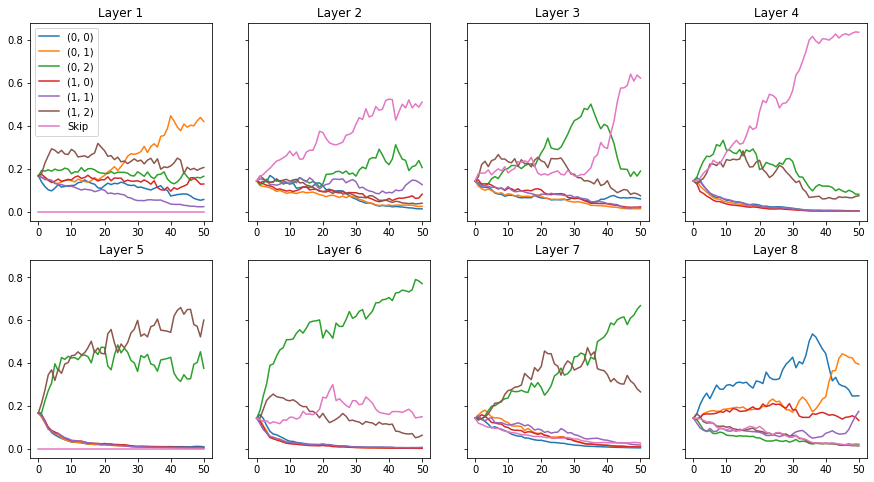

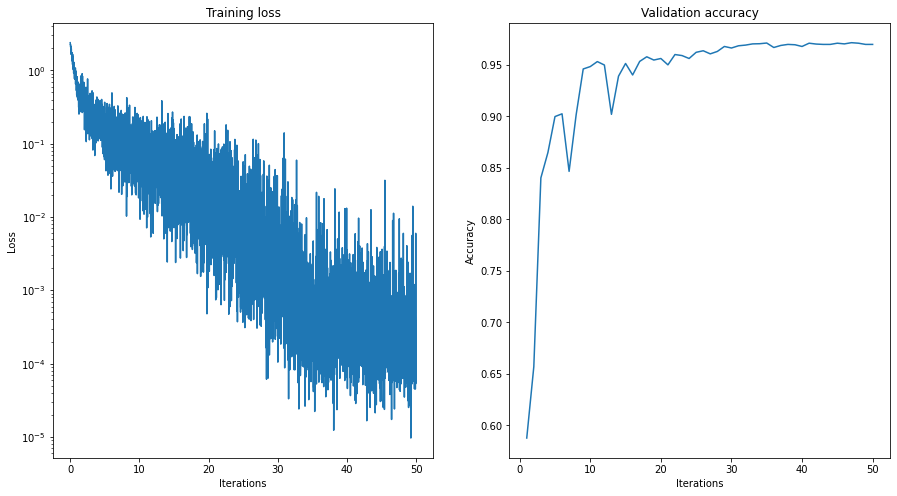

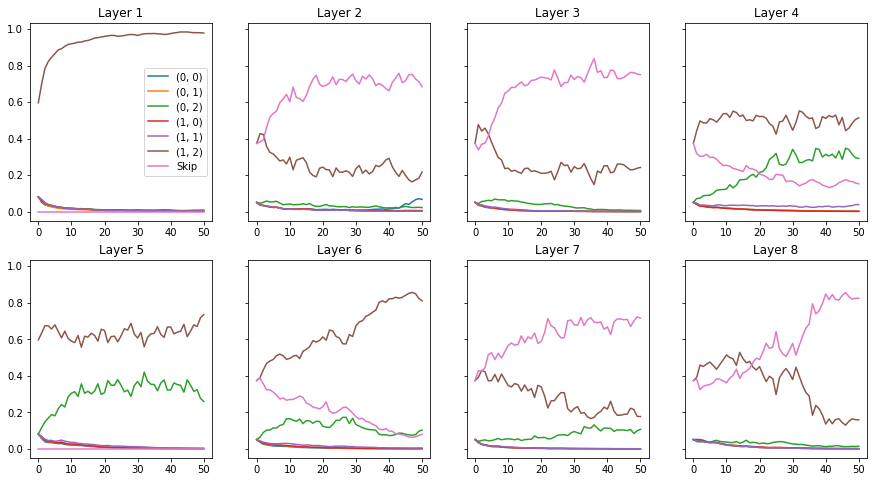

In [43]:
plotdea("out/olympe/logsdea_2022-08-11_14:41:53.pkl")
plotdea("out/olympe/logsdea_2022-08-11_14:42:15.pkl")